# Faces generation using Generative Adversarial Network (GAN)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn as nn
import torch
from torch.utils.data import DataLoader 
from data_manipulation.faces import FacesDataset

## Load data for training

In [2]:
data_dir = 'data/img_align_celeba/img_align_celeba/'
dataset = FacesDataset(data_dir)

batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size)

## Define Components

In [3]:
from models.faces import FaceGenerator,FaceDiscriminator

input_length = 100

generator = FaceGenerator(input_length)
discriminator = FaceDiscriminator()
generator_loss = nn.BCELoss()
discriminator_loss = nn.BCELoss()
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

## Train GAN

In [4]:
from trainers.general_trainer import Trainer
trainer = Trainer(generator, discriminator, generator_loss, discriminator_loss, generator_optimizer, discriminator_optimizer)
trainer.train(dataloader, input_length)

Epoch 0
Epoch 1


KeyboardInterrupt: 

torch.Size([6, 100])


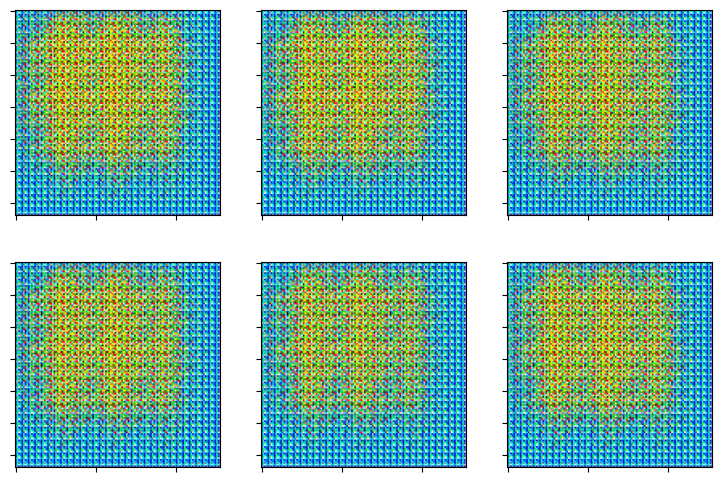

In [ ]:

seed = 1234
n_iteration = 300

n_rows = 2
n_cols = 3
scale = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*scale, n_rows*scale))


np.random.seed(seed)
noise = torch.tensor(np.random.normal(0, 1, (n_rows*n_cols, input_length)), dtype=torch.float)

generator = torch.load("saved_models/generator_{0}.pth".format(n_iteration))
generator.eval()
with torch.no_grad():
    fake_images = generator(noise)


for row_id in range(n_rows):
    for col_id in range(n_cols):
        index = row_id * n_cols + col_id
        face_image = fake_images[index].detach()
        face_image = (face_image + 1)/2
        axs[row_id, col_id].imshow(face_image.permute((1,2,0)))
        axs[row_id, col_id].set_xticklabels([])
        axs[row_id, col_id].set_yticklabels([])
        #axs[0, 0].set_title('Axis [0, 0]')
        
